<a href="https://colab.research.google.com/github/javierandresm13/03MIAR---Algoritmos-Optimizacion/blob/main/Algoritmos_AG4_plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG4 - Actividad Guiada 4
Nombre: Javier Moreno <br>
Link:   https://colab.research.google.com/drive/16zS0bb5Xiphm7NLEc44ZZEQGsjdenjKH?usp=sharing <br>
Github: https://github.com/javierandresm13/03MIAR---Algoritmos-Optimizacion/blob/main/Algoritmos_AG4_plantilla.ipynb
<br>


#Carga de librerias

In [34]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [32]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




gzip: swiss42.tsp already exists; do you wish to overwrite (y or n)? ^C


In [33]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [ ]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp


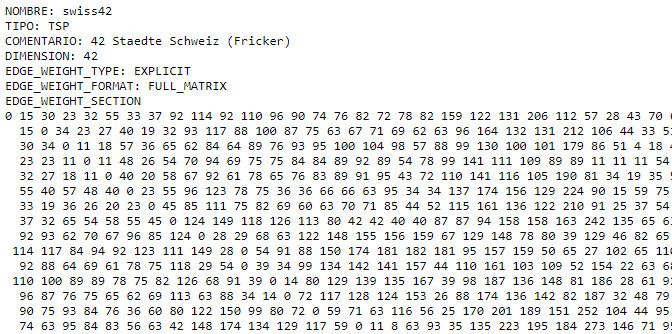

In [ ]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [ ]:
Nodos

In [ ]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal)
print(distancia_total(sol_temporal, problem))

[0, 21, 34, 23, 35, 17, 7, 9, 2, 20, 10, 8, 32, 29, 19, 18, 25, 1, 39, 30, 28, 24, 5, 3, 26, 31, 33, 36, 16, 40, 13, 14, 15, 38, 4, 37, 41, 12, 27, 11, 22, 6]
4764


#BUSQUEDA ALEATORIA

In [ ]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 100000)

Mejor solución: [0, 3, 12, 37, 19, 18, 2, 20, 39, 21, 1, 29, 28, 41, 11, 24, 40, 23, 22, 25, 5, 31, 35, 17, 34, 33, 36, 15, 26, 4, 9, 27, 13, 16, 6, 32, 8, 10, 14, 7, 30, 38]
Distancia     : 3518


#BUSQUEDA LOCAL

In [ ]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3518
Distancia Mejor Solucion Local: 3258


In [ ]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  40 , la mejor solución encontrada es: [0, 1, 6, 4, 3, 27, 2, 8, 9, 21, 39, 29, 30, 38, 22, 24, 40, 23, 41, 10, 28, 32, 34, 33, 20, 35, 36, 17, 37, 15, 16, 14, 19, 13, 18, 12, 11, 25, 26, 5, 7, 31]
Distancia     : 1612


## Propuesta de mejora:

###  Búsqueda local con Entornos variables. ¿Se puede mejorar con otros operadores de vecindad variables?

El código implementa un enfoque basado en metaheurísticas para resolver problemas de optimización utilizando técnicas como la heurística del vecino más cercano, la búsqueda local, y el Vecindario Variable (VNS).


- Función de Evaluación: Calcula la distancia total de una solución para evaluar su calidad.

- Heurística del Vecino Más Cercano: Genera una solución inicial construyendo iterativamente una ruta basada en el nodo más cercano no visitado.

- Generación de Vecindarios: Produce soluciones vecinas mediante el intercambio de nodos, explorando así el espacio de soluciones cercanas.

- Búsqueda Local Mejorada con VNS: Alterna entre diferentes estructuras de vecindario para evitar mínimos locales, buscando continuamente mejoras en la solución.


El algoritmo comienza con una solución inicial y la mejora mediante la búsqueda local y VNS, lo que permite encontrar soluciones de alta calidad en problemas complejos al explorar múltiples soluciones vecinas.

In [54]:
def distancia_total(solucion, problem):
    return sum(problem.get_weight(solucion[i], solucion[i+1]) for i in range(len(solucion)-1)) + problem.get_weight(solucion[-1], solucion[0])

def genera_vecina(solucion, problem):
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)
    for i in range(1, len(solucion) - 1):
        for j in range(i + 1, len(solucion)):
            vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
            distancia_vecina = distancia_total(vecina, problem)
            if distancia_vecina < mejor_distancia:
                mejor_distancia = distancia_vecina
                mejor_solucion = vecina
    return mejor_solucion

def genera_vecina_vns(solucion, problem):
    """ Variante de genera_vecina con intercambio de 3 nodos """
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)
    for _ in range(5):  # Intentamos 5 variaciones aleatorias
        i, j, k = sorted(random.sample(range(1, len(solucion) - 1), 3))
        vecina = (solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[k]] + solucion[j+1:k] + [solucion[i]] + solucion[k+1:])
        distancia_vecina = distancia_total(vecina, problem)
        if distancia_vecina < mejor_distancia:
            mejor_distancia = distancia_vecina
            mejor_solucion = vecina
    return mejor_solucion

def busqueda_local_vns(solucion, problem):
    solucion_referencia = solucion[:]
    mejor_distancia = distancia_total(solucion_referencia, problem)
    iteracion = 0
    while True:
        iteracion += 1
        vecina = genera_vecina_vns(solucion_referencia, problem) if iteracion % 2 == 0 else genera_vecina(solucion_referencia, problem)
        distancia_vecina = distancia_total(vecina, problem)
        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina
            mejor_distancia = distancia_vecina
        else:
            print("En la iteración", iteracion, "la mejor solución encontrada es:", mejor_solucion)
            print("Distancia:", mejor_distancia)
            return mejor_solucion
        solucion_referencia = vecina

def solucion_vecino_mas_cercano(problem):
    """Genera una solución inicial usando el heurístico de Vecino Más Cercano."""
    nodo_actual = random.choice(list(problem.get_nodes()))
    solucion = [nodo_actual]
    nodos_disponibles = set(problem.get_nodes()) - {nodo_actual}
    while nodos_disponibles:
        nodo_mas_cercano = min(nodos_disponibles, key=lambda nodo: problem.get_weight(nodo_actual, nodo))
        solucion.append(nodo_mas_cercano)
        nodos_disponibles.remove(nodo_mas_cercano)
        nodo_actual = nodo_mas_cercano
    return solucion


# Generar una solución inicial con heurística de Vecino Más Cercano
solucion_inicial = solucion_vecino_mas_cercano(problem)
print("Distancia solución inicial:", distancia_total(solucion_inicial, problem))

# Ejecutar búsqueda local mejorada con VNS
mejor_solucion = busqueda_local_vns(solucion_inicial, problem)


Distancia solución inicial: 1592
En la iteración 2 la mejor solución encontrada es: [5, 26, 18, 12, 11, 25, 10, 8, 9, 23, 41, 29, 30, 28, 2, 27, 3, 4, 6, 1, 0, 7, 37, 15, 14, 16, 19, 13, 17, 31, 36, 35, 20, 34, 33, 32, 38, 22, 39, 21, 40, 24]
Distancia: 1568


#SIMULATED ANNEALING


In [ ]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [ ]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 28, 30, 29, 7, 15, 37, 17, 31, 20, 34, 38, 25, 11, 12, 2, 27, 36, 35, 33, 32, 22, 39, 23, 9, 1, 16, 14, 19, 6, 26, 5, 13, 18, 4, 3, 10, 8, 41, 40, 24, 21]
con una distancia total de 2294


## Recocido simulado ¿Se puede mejorar con otra elección no tan aleatoria( función genera_vecina_aleatorio() ) ?

### Propuesta de Mejora

 El código implementa un algoritmo de recocido simulado con mejoras para reducir la aleatoriedad y aumentar la eficiencia en la búsqueda de soluciones óptimas para problemas de rutas. Las principales mejoras incluyen:


- Generación Estructurada de Soluciones Iniciales: Se crea una solución inicial que cubre todos los nodos de manera sistemática, asegurando un buen punto de partida.

- Cálculo Preciso de Distancias: Se utiliza una función para calcular eficientemente la distancia total de una ruta, lo que permite una evaluación precisa de las soluciones.

- Vecindario Informado: La generación de soluciones vecinas se realiza mediante el intercambio estratégico de nodos, explorando el espacio de búsqueda cercano de manera más dirigida.

- Control de Aceptación de Soluciones: Se implementa una función de probabilidad que regula la aceptación de soluciones peores en función de la temperatura, equilibrando exploración y explotación.

- Enfriamiento Adaptativo: La temperatura se reduce gradualmente con un factor de enfriamiento, refinando las soluciones a medida que el algoritmo progresa.


Estas técnicas combinan la aleatoriedad controlada con decisiones informadas para mejorar la eficacia del recocido simulado en la búsqueda de soluciones óptimas.

In [62]:

def crear_solucion(nodos):
    """Genera una solución inicial aleatoria."""
    solucion = [nodos[0]]
    nodos_restantes = set(nodos[1:])
    while nodos_restantes:
        nodo_elegido = random.choice(list(nodos_restantes))
        solucion.append(nodo_elegido)
        nodos_restantes.remove(nodo_elegido)
    return solucion

def distancia_total(solucion, problem):
    """Calcula la distancia total de una solución."""
    return sum(problem.get_weight(solucion[i], solucion[i+1]) for i in range(len(solucion)-1)) + problem.get_weight(solucion[-1], solucion[0])

def genera_vecina_aleatorio(solucion):
    """Genera una solución vecina intercambiando dos nodos al azar."""
    i, j = sorted(random.sample(range(1, len(solucion)), 2))
    return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

def probabilidad(T, d):
    """Calcula la probabilidad de aceptar una solución peor."""
    return random.random() < math.exp(-d / T)

def bajar_temperatura(T, alpha=0.995):
    """Reduce la temperatura gradualmente."""
    return T * alpha

def recocido_simulado(problem, TEMPERATURA):
    solucion_referencia = crear_solucion(Nodos)
    distancia_referencia = distancia_total(solucion_referencia, problem)

    mejor_solucion = solucion_referencia
    mejor_distancia = distancia_referencia

    while TEMPERATURA > 0.0001:
        vecina = genera_vecina_aleatorio(solucion_referencia)
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina
            mejor_distancia = distancia_vecina

        if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina)):
            solucion_referencia = vecina
            distancia_referencia = distancia_vecina

        TEMPERATURA = bajar_temperatura(TEMPERATURA)

    print("La mejor solución encontrada es:", mejor_solucion)
    print("Con una distancia total de:", mejor_distancia)
    return mejor_solucion

# Ejemplo de uso
# Asegúrate de reemplazar 'tu_archivo.tsp' con el nombre correcto de tu archivo
sol = recocido_simulado(problem, 10000000)

La mejor solución encontrada es: [0, 2, 32, 20, 34, 30, 8, 23, 40, 24, 21, 39, 29, 28, 27, 3, 1, 17, 31, 36, 35, 33, 38, 22, 9, 41, 10, 25, 12, 11, 18, 26, 4, 6, 5, 13, 19, 14, 16, 15, 37, 7]
Con una distancia total de: 1649


## Referencias

[1] https://jamoreno.webs.ull.es/www/papers/VNS2PL.pdf

[2] OpenAI. (2025). Multiples consultas de apoyo al codigo hechas a ChatGPT versión gratuita. Consultado el 1 de Febrero 2025, en https://chatgpt.com/share/679ed255-061c-8006-9cd0-5893333587b4

#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


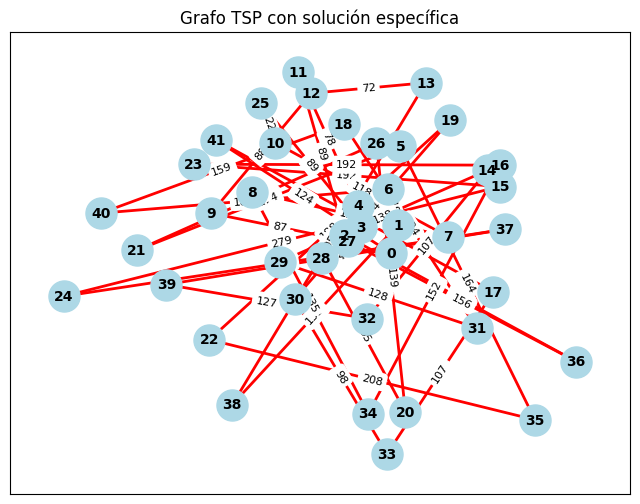

In [ ]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

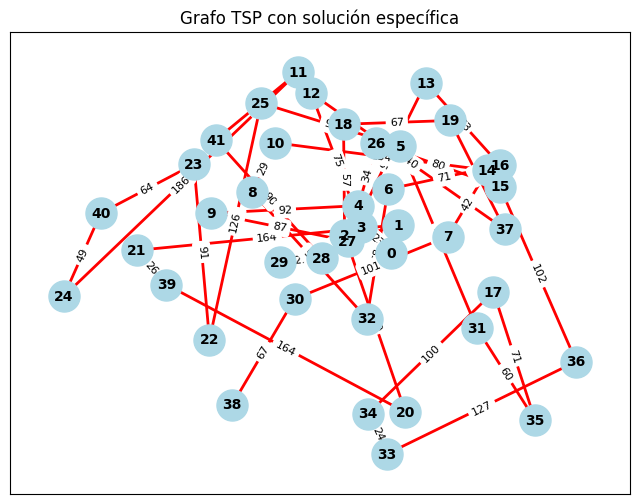

In [ ]:
plot_tsp_solution(problem.edge_weights, solucion)